In [1]:
from matplotlib import pyplot as plt
import numpy as np
import mogreps
import netCDF4
import pandas as pd

In [3]:
!pip install sklearn

    100% |████████████████████████████████| 12.4MB 2.9MB/s 
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /home/paula/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [4]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset.
traindata=pd.read_table('traindata.txt',usecols=[1,2,3,4,5,6,7,8])
testdata=pd.read_table('testdata.txt',usecols=[1,2,3,4,5,6,7,8])

In [9]:
# Split the data into training/testing sets.
humidity_train = np.array(traindata['Xdes'])
humidity_test = np.array(testdata['Xdes'])
pressure_train =  np.array(traindata['Ydes'])
pressure_test = np.array(testdata['Ydes'])
wind_train =  np.array(traindata['Sdes'])
wind_test = np.array(testdata['Sdes'])

In [31]:
# Split the targets into training/testing sets.
temperature_train = np.array(traindata['Y'])
temperature_test = np.array(testdata['Y'])

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(np.stack((humidity_train,pressure_train,wind_train),axis=1),temperature_train)

# Make predictions using the testing set
temperature_pred = regr.predict(np.stack((humidity_test,pressure_test,wind_test),axis=1))

# The coefficients.
print('Coefficients: \n', regr.coef_)
# The mean squared error.
print("Mean squared error: %.2f"
      % mean_squared_error(temperature_test, temperature_pred))
# Explained variance score: 1 is perfect prediction.
print('Variance score: %.2f' % r2_score(temperature_test, temperature_pred))



Coefficients: 
 [ 0.00801814  1.80948159 -0.00225465]
Mean squared error: 0.13
Variance score: 0.97


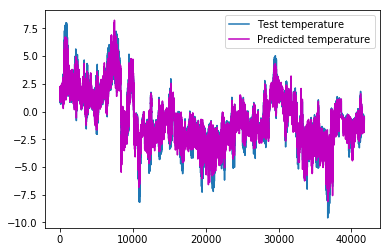

In [35]:
plt.plot(temperature_test,label='Test temperature')
plt.plot(temperature_pred,'m',label='Predicted temperature')
plt.legend()

Text(0,0.5,'Predicted temperature')

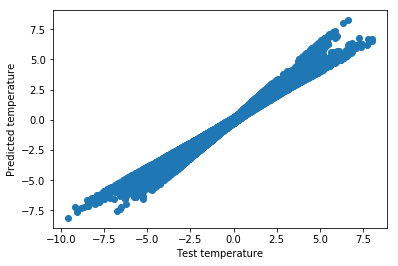

In [37]:
plt.scatter(temperature_test,temperature_pred)
plt.xlabel('Test temperature')
plt.ylabel('Predicted temperature')
#plt.legend()